In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
company_df= pd.read_csv('moved.csv')
trips_df = pd.read_csv('moved04.csv')

In [3]:
company_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [4]:
company_df.head()

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


In [5]:
company_df.describe()

,trips_amount
count,64.000000
mean,2145.484375
std,3812.310186
min,2.000000
25%,20.750000
50%,178.500000
75%,2106.500000
max,19558.000000


In [6]:
top_10_empresas = company_df.sort_values('trips_amount', ascending=False).head(10)
top_10_empresas

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
5,Chicago Carriage Cab Corp,9181
6,City Service,8448
7,Sun Taxi,7701
8,Star North Management LLC,7455
9,Blue Ribbon Taxi Association Inc.,5953


In [7]:
top_10_empresas = top_10_empresas.set_index('company_name')

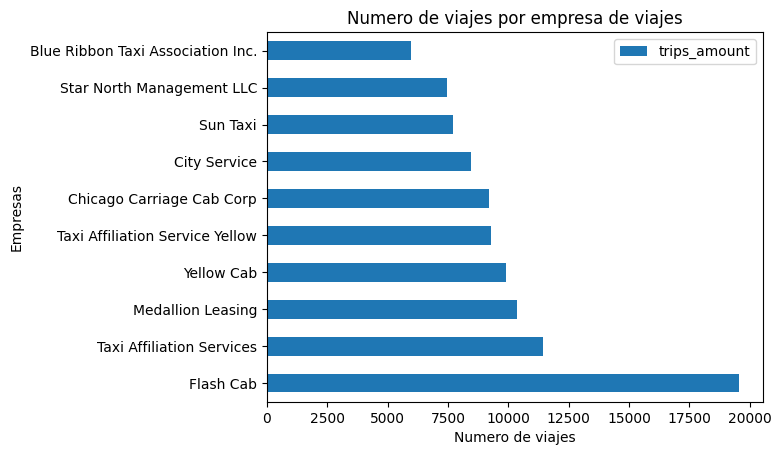

In [8]:
top_10_empresas.plot(kind = "barh").set_title('Numero de viajes por empresa de viajes')
plt.xlabel('Numero de viajes')
plt.ylabel('Empresas')
plt.show()

La grafica nos muestra la relacion entre el numemro de viajes y la empresas donde podemos resaltar que flash cab es la empresa que mas viajes hace por encima de 17500 por otro lado la empresa con menor numeor de viajes dentro del top 10 es Blue Ribbon Taxi Association Inc con 5953 viajes


In [10]:
trips_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


In [11]:
trips_df['average_trips'] = trips_df['average_trips'].astype(int)

In [12]:
trips_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   dropoff_location_name  94 non-null     object
 1   average_trips          94 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.6+ KB


In [13]:
trips_df.head()

,dropoff_location_name,average_trips
0,Loop,10727
1,River North,9523
2,Streeterville,6664
3,West Loop,5163
4,O'Hare,2546


In [14]:
trips_df.describe()

,average_trips
count,94.000000
mean,599.478723
std,1714.555974
min,1.000000
25%,14.000000
50%,51.500000
75%,298.750000
max,10727.000000


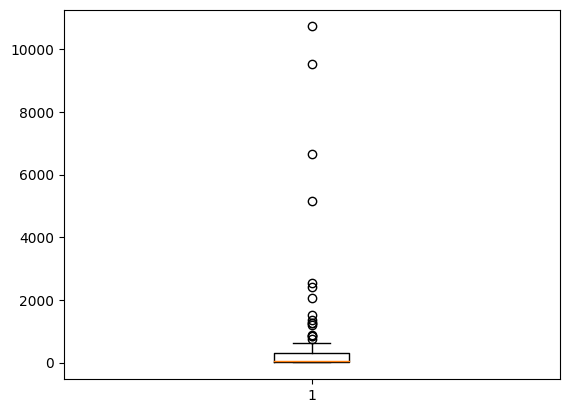

In [15]:
plt.boxplot(trips_df['average_trips'])
plt.show()

Podemos encontrar valores atipicos, estos no los eliminamos ya que nos puede decir que esos lugares exclusivamente hacen mas viajes que los otros 

In [17]:
top_10_destinos = trips_df.sort_values('average_trips', ascending=False).head(10)
top_10_destinos

,dropoff_location_name,average_trips
0,Loop,10727
1,River North,9523
2,Streeterville,6664
3,West Loop,5163
4,O'Hare,2546
5,Lake View,2420
6,Grant Park,2068
7,Museum Campus,1510
8,Gold Coast,1364
9,Sheffield & DePaul,1259


In [18]:
top_10_destinos.set_index('dropoff_location_name', inplace = True)


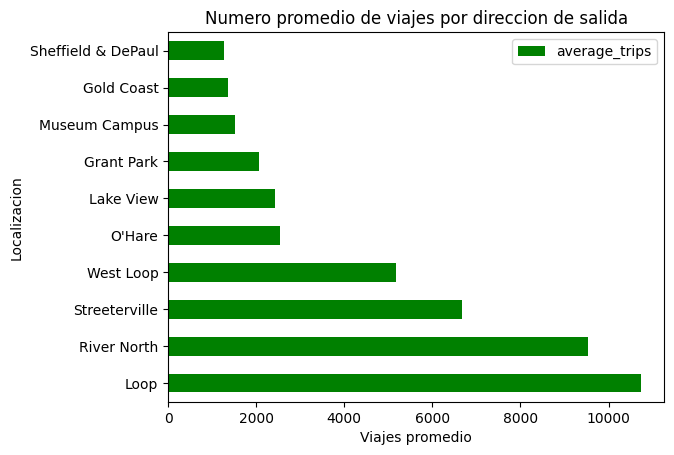

In [19]:
top_10_destinos.plot(kind='barh', color = 'green')
plt.title('Numero promedio de viajes por direccion de salida')
plt.xlabel('Viajes promedio')
plt.ylabel('Localizacion')
plt.show()

En la grafica mostramos un top 10 entre  una relacion de los viajes con respecto a la localizacion donde podemos observar que loop es el lugar con mas de 1000 viajes promedio

In [21]:
data_viaje_loop_ohara = pd.read_csv('moved_project_sql_result_07.csv')

In [22]:
data_viaje_loop_ohara.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


In [23]:
data_viaje_loop_ohara.head()

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


In [24]:
data_viaje_loop_ohara.describe()

,duration_seconds
count,1068.000000
mean,2071.731273
std,769.461125
min,0.000000
25%,1438.250000
50%,1980.000000
75%,2580.000000
max,7440.000000


<AxesSubplot:xlabel='duration_seconds', ylabel='weather_conditions'>

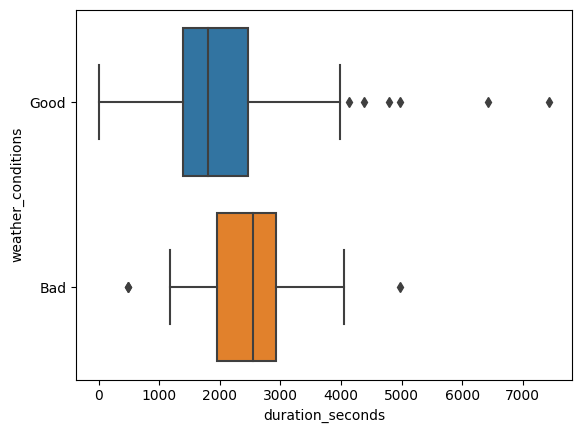

In [25]:
sns.boxplot(x='duration_seconds', y= 'weather_conditions', data =data_viaje_loop_ohara)

Estos graficos de cajas me muestra la relacion entre la condiciones del clima y la duracion de lo cual, cuando hay un clima malo, me lleva mas tiempo 

<AxesSubplot:xlabel='duration_seconds'>

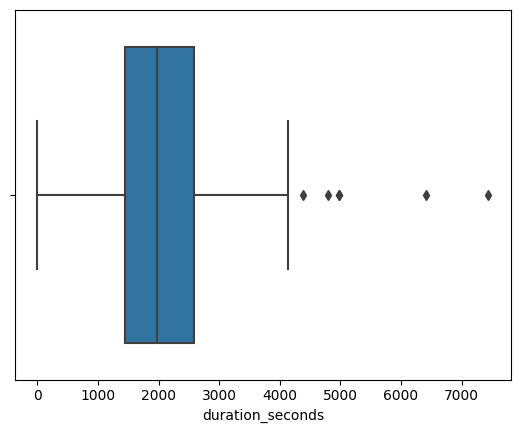

In [27]:
sns.boxplot(x='duration_seconds', data =data_viaje_loop_ohara)

In [28]:
Q1 = data_viaje_loop_ohara['duration_seconds'].quantile(0.25)

In [29]:
Q3 = data_viaje_loop_ohara['duration_seconds'].quantile(0.75)

In [30]:
IQR = Q3 - Q1

In [31]:
LIMITE_SUPERIOR = Q3 + (1.5*IQR)

In [32]:
LIMITE_SUPERIOR

4292.625

EN ESTA GRAFICA PODEMOS OBSERVAR QUE LOS OUTLIERS ESTAN POR ARRIBE DE 4292.625

In [34]:
date_hipotesis= data_viaje_loop_ohara.query('duration_seconds <= @LIMITE_SUPERIOR')

<AxesSubplot:xlabel='duration_seconds'>

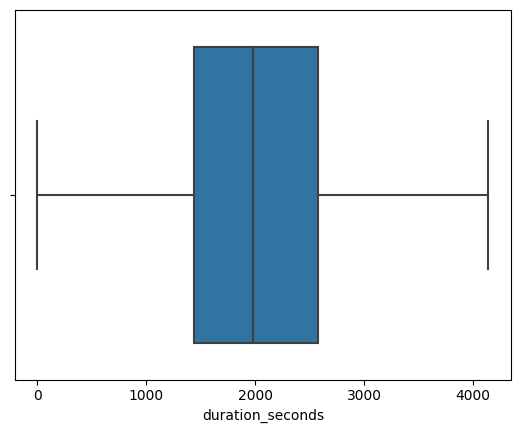

In [35]:
sns.boxplot(x='duration_seconds', data=date_hipotesis)

<AxesSubplot:xlabel='duration_seconds', ylabel='weather_conditions'>

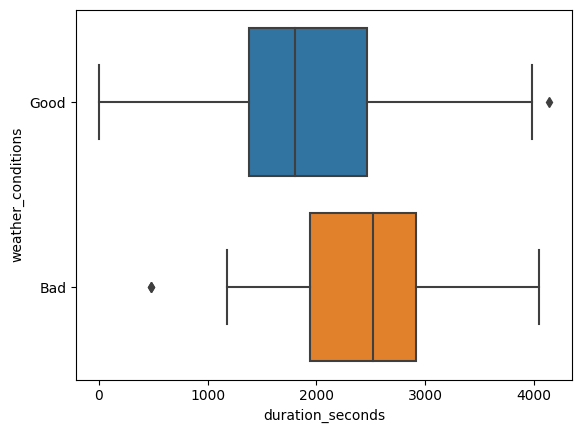

In [36]:
sns.boxplot(x='duration_seconds', y= 'weather_conditions', data = date_hipotesis)

Estos graficos de cajas nosmuestran la relacion entre las condiones climaticas y la duration en segundos donde la media para el clima bueno es menor a 200 y para la mala ('bad'), se encunentra cerca de 3000

In [38]:
from scipy import stats as st
alpha= 0.05
sample = date_hipotesis.query('weather_conditions == "Good"')
rain_sample = date_hipotesis.query('weather_conditions == "Bad"')

results = st.ttest_ind(sample.duration_seconds, rain_sample.duration_seconds)

print(results.pvalue)

1.2430038032744411e-13


ho = el valor de alpha es mayor a results.pvalue
h1 = el valor de alpha es menor a results.pval
se rechaza la hipotesis nula ya los pormedios son diferente ya que aumenta la duracion de segundos cuando el clima es malo 

In [40]:
results_levene= st.levene(sample.duration_seconds, rain_sample.duration_seconds)
print(results_levene.pvalue)

0.6196707782686355


No se puede rechazar ya que la prueba levene no es menor al alpha , por tanto las varianzas son iguales

### Conclusión

In [42]:
los datos utilizados en este analisis son los viajes, empresas, lugares y climas y la relacion que existe entre estos. Analizamos cuales son las empresas con mas numeros de viejes y estos viejes donde concurren masa, demas de que el clima es un factor externo peor que si afecta al analisis , ya que si  existe un buen clima la duracion de vieje es menor y si el malo este tiende a durar mas

<div class="alert alert-block alert-warning">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Excelente Alvaro! Realizaste una correcta aplicación de las pruebas estadísticas para identificar si la hipótesis de la duración de los viajes era estadísticamente significativa en su diferencia. Esto es importante especialmente en proyectos de pruebas AB donde tienes que determinar que grupo experimental tuvo mejor resultado, así que estas pruebas serán una muy buena herramienta y es importante que comprendas su uso e interpretación.
    
Te recomendaría para tus próximos proyectos utilizar los títulos de Markdown para separar cada sección así cómo cada uno de tus comentarios igual en una celda tipo Markdown en lugar de código. Y sobre todo mantén un orden en tu proyecto que sea claro, es decir, la importación de los datos se debe realizar una sola celda o sección, en otra se debe realizar la exploración, en otra las pruebas de hipótesis y así con el resto de secciones que se necesite.
    
Saludos!
</div>